# Rubyplot Image Tutorial
This tutorial contains a tutorial for Rubyplot Image  
P.S. - Currently only for Magick backend

## Table of Contents
1. Copying an image
2. Copying a part of an image
3. Changing channels  
  3a. Exporting specific order of maps  
  3b. Importing specific order of maps  
4. Adding padding  
5. Manipulating Values (using Numo array)  

In [1]:
require 'rubyplot' # Import rubyplot
Rubyplot.inline # Setting inline plotting

## 1. Copying an Image

Following steps are taken:
1. The image is read and stored in a Rubyplot::Image object
2. Pixels are exported from the image
3. A new Rubyplot::Image object is created with specified rows and columns
4. Exported pixels are imported to the Rubyplot::Image object

In [2]:
img0 = Rubyplot::Image.new # Creating a new Image Object
img0.imread('mnist0.jpg') # Reading a MNIST Image
img0.imshow # Showing the Image

In [3]:
img0_pix = img0.export_pixels("I") # Exporting pixels from img0, map is set as intensity(I) as the image is grayscale
img0_copy = Rubyplot::Image.new(img0.columns,img0.rows) # Creating an Image to copy img0 with same number of columns and rows
img0_copy.import_pixels(img0_pix,"I") # Importing pixels extracted from img0
img0_copy.imshow # Showing the copied image
# img0_copy.imwrite("mnist0_copy.jpg") # Image can be written with any format

## 2. Copying a part of an image

Following steps are taken:
1. The image is read and stored in a Rubyplot::Image object
2. Pixels are extracted from the image with an offset and specified dimensions
3. A new Rubyplot::Image object is created with specified rows and columns equal to exported dimensions
4. Extracted pixels are imported to the Rubyplot::Image object

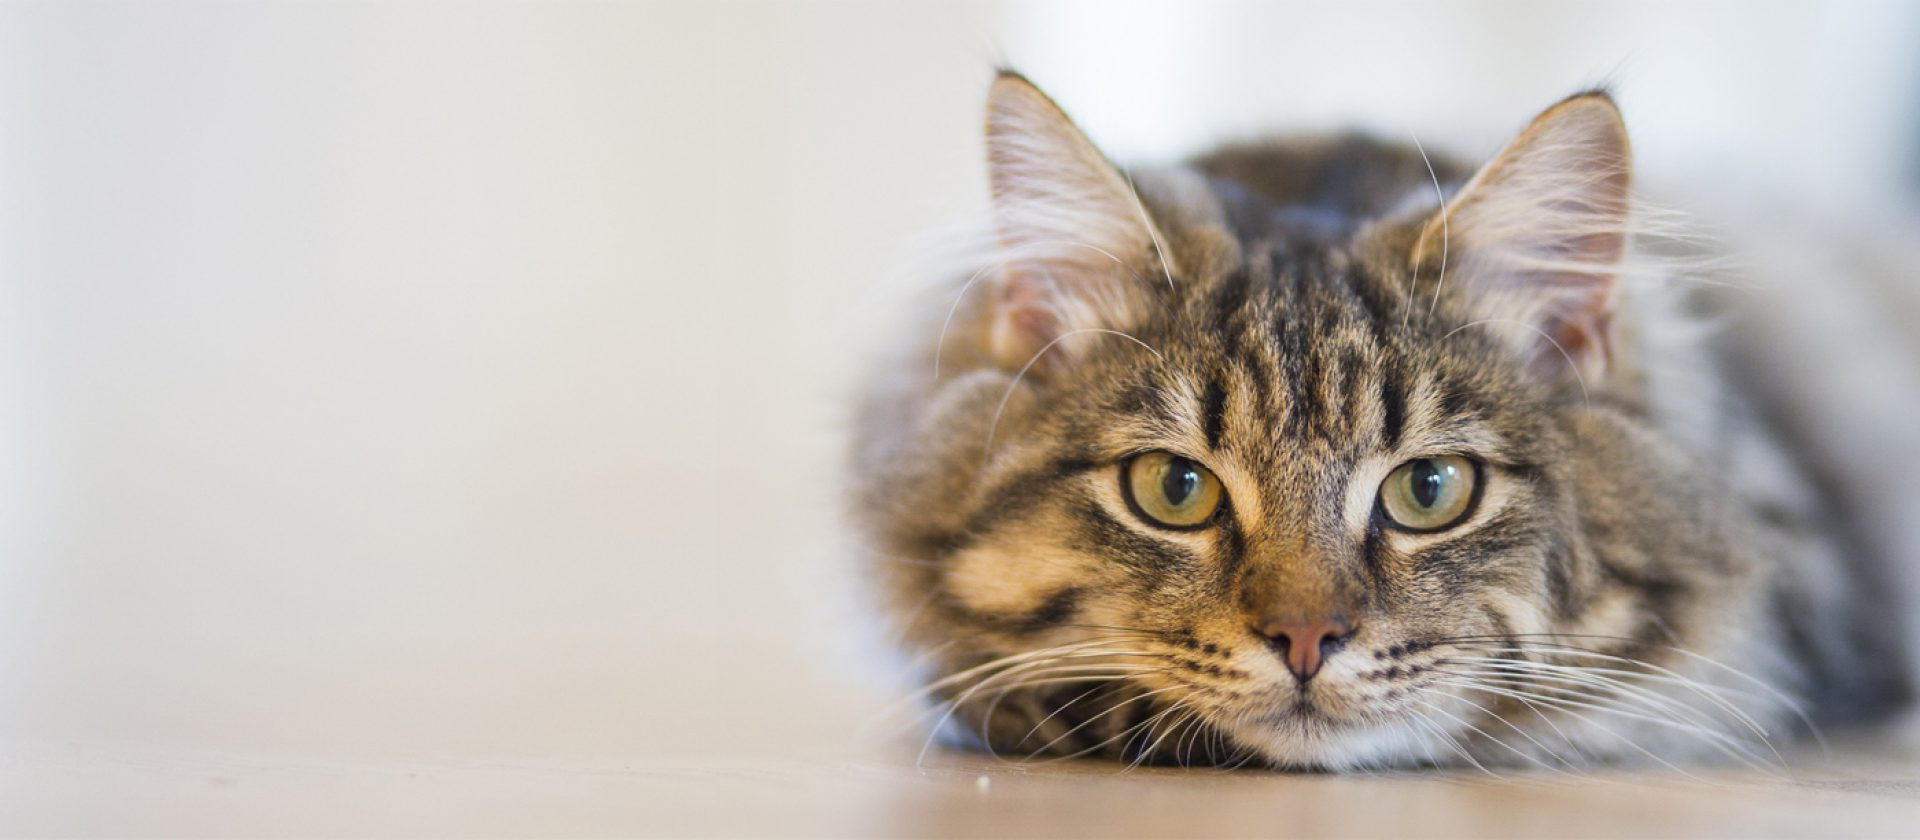

In [4]:
img1 = Rubyplot::Image.new # Creating a new Image Object
img1.imread('cat.jpg') # Reading an image of a cat
img1.imshow # Showing the Image

In [5]:
# Columns and Rows in Image
puts('Columns in image = '+img1.columns.to_s)
puts('Rows in image = '+img1.rows.to_s)

Columns in image = 1920
Rows in image = 840


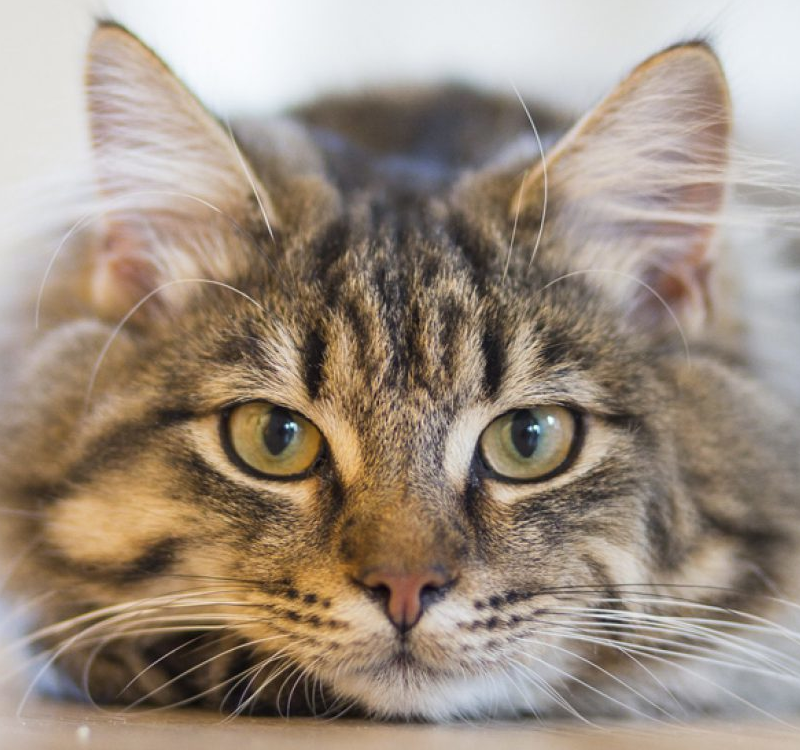

In [6]:
img1_pix = img1.export_pixels("RGB",900,50,800,750) # Exporting pixels from img1, map is set as RGB as the image is RGB
# 800x750 pixels are exported from the position (900,50) i.e. offset is (900,50)
img1_copy = Rubyplot::Image.new(800,750) # Creating an Image to copy img1 with number of columns and rows exported
img1_copy.import_pixels(img1_pix) # Importing pixels extracted from img1
img1_copy.imshow # Showing the copied image
# img1_copy.imwrite("cat_copy.jpg") # Image can be written with any format

## 3. Changing channels

This can be done in two ways:

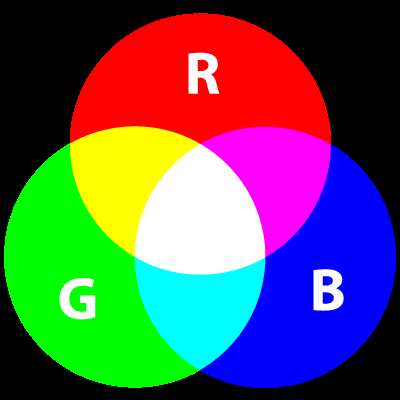

In [7]:
img2 = Rubyplot::Image.new # Creating a new Image Object
img2.imread('rgb.png') # Reading an image
img2.imshow # Showing the Image

### 3a. Exporting specific order of maps

Following steps are taken:
1. The image is read and stored in a Rubyplot::Image object
2. Pixels are exported from the image in the order BRG
3. A new Rubyplot::Image object is created with specified rows and columns
4. Exported pixels are imported to the Rubyplot::Image object in the order RGB

Since RGB is exported in order BRG; Blue becomes Red, Red Becomes Green and Green becomes Blue
i.e. BRG -> RGB

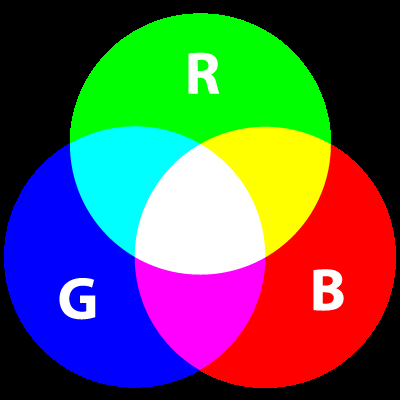

In [8]:
img2_pix_brg = img2.export_pixels("BRG") # Exporting pixels from ima2, map is set as BRG
img2_copy_brg = Rubyplot::Image.new(img2.columns,img2.rows) # Creating an Image to copy img2 with same number of columns and rows
img2_copy_brg.import_pixels(img2_pix_brg,"RGB") # Importing pixels extracted from img2 in the order RGB
img2_copy_brg.imshow # Showing the copied image
# img2_copy_brg.imwrite("brg.png") # Image can be written with any format

### 3b. Importing specific order of maps

Following steps are taken:
1. The image is read and stored in a Rubyplot::Image object
2. Pixels are exported from the image in the order RGB
3. A new Rubyplot::Image object is created with specified rows and columns
4. Exported pixels are imported to the Rubyplot::Image object in the order GBR

Since RGB is imported in order GBR; Red becomes Green, Green Becomes Blue and Blue becomes Red
i.e. RGB -> GBR

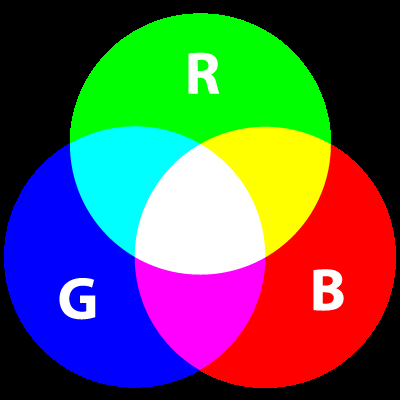

In [9]:
img2_pix_gbr = img2.export_pixels # Exporting pixels from img2, map is set as RGB as the image is RGB
img2_copy_gbr = Rubyplot::Image.new(img2.columns,img2.rows) # Creating an Image to copy img2 with same number of columns and rows
img2_copy_gbr.import_pixels(img2_pix_gbr, "GBR") # Importing pixels extracted from img2 in the order GBR
img2_copy_gbr.imshow # Showing the copied image
# img2_copy_gbr.imwrite("gbr.png") # Image can be written with any format

## 4. Adding padding

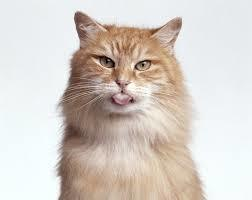

In [10]:
img3 = Rubyplot::Image.new # Creating a new Image Object
img3.imread('cat2.jpeg') # Reading an image of a cat
img3.imshow # Showing the Image

In [11]:
# Columns and Rows in Image
puts('Columns in image = '+img3.columns.to_s)
puts('Rows in image = '+img3.rows.to_s)

Columns in image = 252
Rows in image = 200


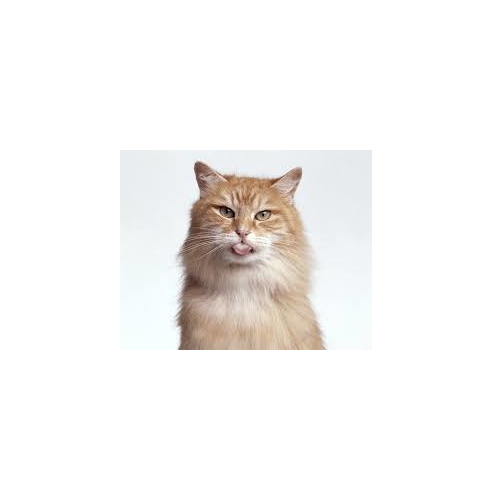

In [12]:
img3_pix = img3.export_pixels # Exporting pixels from img3, map is set as default(=RGB) as the image is RGB
img3_copy = Rubyplot::Image.new(500,500) # Creating an Image to copy img1 with more number of columns and rows than exported
img3_copy.import_pixels(img3_pix,"RGB",120,150,252,200) # Importing pixels extracted from img3 to offset (120,150)
img3_copy.imshow # Showing the copied image
# img3_copy.imwrite("cat2_copy.jpg") # Image can be written with any format

In [13]:
# Columns and Rows in Image
puts('Columns in image = '+img3_copy.columns.to_s)
puts('Rows in image = '+img3_copy.rows.to_s)

Columns in image = 500
Rows in image = 500


## 5. Manipulating Values (using Numo array)

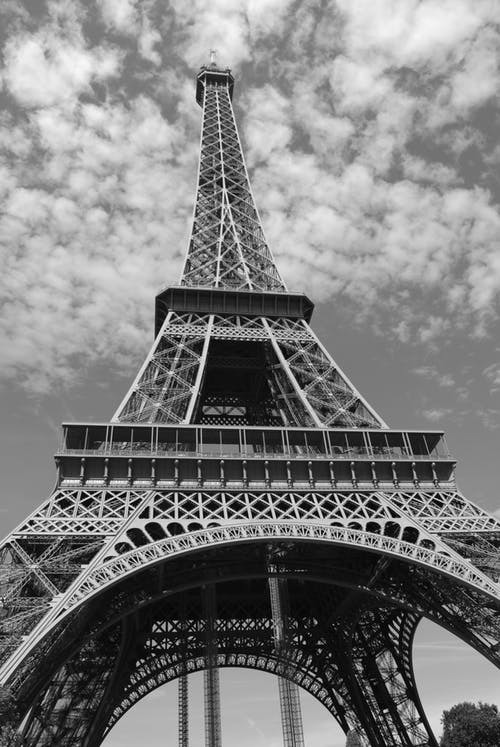

In [14]:
img4 = Rubyplot::Image.new # Creating a new Image Object
img4.imread('paris.jpeg') # Reading an image
img4.imshow # Showing the Image

In [15]:
# Columns and Rows in Image
puts('Columns in image = '+img4.columns.to_s)
puts('Rows in image = '+img4.rows.to_s)

Columns in image = 500
Rows in image = 747


In [16]:
require 'numo/narray'
img4_pix = img4.export_pixels # Exporting pixels from img4, map is set as RGB as the image is RGB
img4_pix_narray = Numo::DFloat.cast(img4_pix) # Casting exported pixel array as a Numo::DFloat array
puts('Converted Ruby Array to Numo array of shape '+img4_pix_narray.shape.to_s)

Converted Ruby Array to Numo array of shape [3, 747, 500]


In [17]:
# Manipulating Numo array
img4_pix_narray_new = Numo::DFloat.cast(img4_pix_narray>(Rubyplot.QuantumRange/3)) * Rubyplot.QuantumRange
puts 'Choosing pixels which have more intensity than Rubyplot.QuantumRange/3 for each channel'
# Intensity of a pixel ranges from 0 to Rubyplot.QuantumRange

Choosing pixels which have more intensity than Rubyplot.QuantumRange/3 for each channel


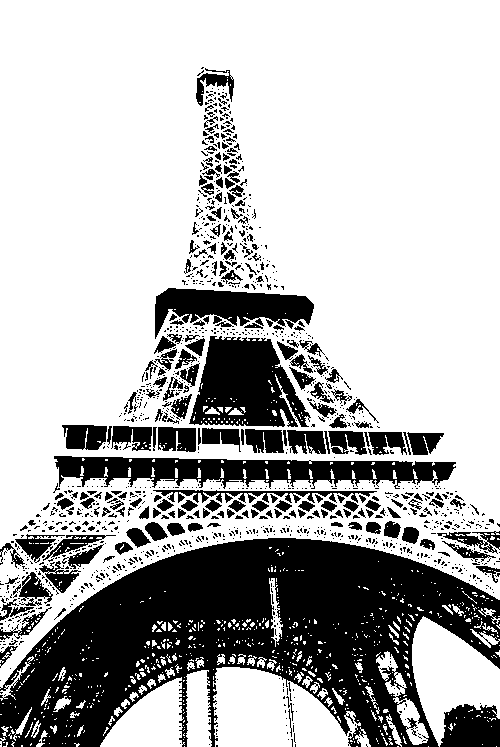

In [18]:
img4_copy = Rubyplot::Image.new(img4.columns,img4.rows) # Creating an Image to copy img4 with number of columns and rows exported
img4_copy.import_pixels(img4_pix_narray_new) # Importing pixels extracted from img4
img4_copy.imshow # Showing the copied image
# img4_copy.imwrite("paris_copy.jpg") # Image can be written with any format